In [ ]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

**Company data set**

In [ ]:
# Importing data set

company=pd.read_csv("/content/Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
# Checking null values if any

company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
# Checking information of data


company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
# As we can see 3 coloumns are categorical, we have to convert them into numerical by label encoding

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
company["ShelveLoc"]=le.fit_transform(company["ShelveLoc"])
company["Urban"]=le.fit_transform(company["Urban"])
company["US"]=le.fit_transform(company["US"])

In [ ]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [ ]:
company["ShelveLoc"].unique()

array([0, 1, 2])

In [ ]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [ ]:
# Divinding the data in X and Y variable

x=company.iloc[:,[0,1,2,3,4,5,7,8,9,10]]
y=company.iloc[:,6]

In [ ]:
x

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1,1
1,11.22,111,48,16,260,83,65,10,1,1
2,10.06,113,35,10,269,80,59,12,1,1
3,7.40,117,100,4,466,97,55,14,1,1
4,4.15,141,64,3,340,128,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1
396,6.14,139,23,3,37,120,55,11,0,1
397,7.41,162,26,12,368,159,40,18,1,1
398,5.94,100,79,7,284,95,50,12,1,1


**Building Decision Tree Classifier using Entropy Criteria**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
# Model building

model=DecisionTreeClassifier(criterion="entropy",max_depth=2)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.5, 0.8333333333333334, 'x[0] <= 6.165\nentropy = 1.431\nsamples = 320\nvalue = [78, 64, 178]'),
 Text(0.25, 0.5, 'x[2] <= 57.5\nentropy = 1.11\nsamples = 114\nvalue = [57, 2, 55]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.918\nsamples = 48\nvalue = [16, 0, 32]'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.11\nsamples = 66\nvalue = [41, 2, 23]'),
 Text(0.75, 0.5, 'x[0] <= 10.485\nentropy = 1.301\nsamples = 206\nvalue = [21, 62, 123]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.192\nsamples = 159\nvalue = [20, 29, 110]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.989\nsamples = 47\nvalue = [1, 33, 13]')]

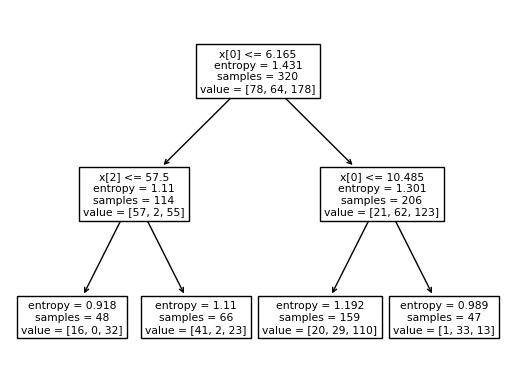

In [ ]:
tree.plot_tree(model)

In [ ]:
ytrain.value_counts() # unique values of y varibales with the counts

2    178
0     78
1     64
Name: ShelveLoc, dtype: int64

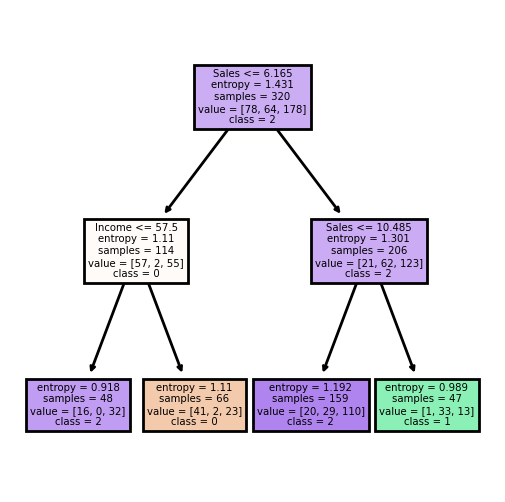

In [ ]:
# Assigning the function and class name to beter visualise the DecisionTree

fn=["Sales","CompPrice","Income","Advertising","Population","Price"] # Feature name
cn=["0","1","2"] # Class names should be in "str"

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=200) # dpi- will increce the size of below tree diagram
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True);


In [ ]:
# Model Prediction.

pred=model.predict(xtest)
pred

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1])

In [ ]:
# Cheking the ytest and pred

pd.crosstab(ytest,pred)

col_0,0,1,2
ShelveLoc,,,
0,5,2,11
1,0,11,10
2,7,2,32


In [ ]:
# Cheking the accuracy of ytest and xpred

np.mean(pred==ytest)

0.6

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [ ]:
# Buling model with gini criterion

gmodel=DecisionTreeClassifier(criterion="gini",max_depth=3)
gmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [ ]:
# Checking accuracy with gini
gpred=model.predict(xtest)
np.mean(gpred==ytest)

0.6